クラスタリング

In [1]:
# クラスタリングのための人工データセット確認
import numpy as np
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

【問題1】中心点の初期値を決める

In [18]:
def random_sample(X,k):
    """
    データ点 X の中からランダムに K 個選ぶ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
    k:選ぶ数
    
    Returns
    -------
    sample_point   次の形のndarray, shape (k, n_features)
        k個のサンプル
    
    """
    import numpy as np
    import random
    a=random.sample(range(len(X)),k)
    sample_point=[X[a[0]]] 
    for i in range(1,len(a)):
        sample_point=np.vstack([sample_point,X[a[i]]])

    return sample_point

In [52]:
#　実装例
random_sample(X,3)

array([[ 0.4519936 ,  3.59377836],
       [-0.30022483,  4.63059663],
       [ 2.25643834,  0.55525861]])

【問題2】SSEを求める関数の作成

In [62]:
def SSE_sampel(lists,next_center):
    """
    SSEを計算
    Parameters
    ----------
    list_wari:SSEを計算する際の振り分けリスト、リストの中にndarray
    jushin : 次の形のndarray, shape (k, n_features)
    Returns
    -------
    SSE: SSEの値を返す 
    """
    
    SSE=0
    lista=[]
    for j in range(len(lists)):
            for i in range(len(lists[j])):
                SSE+=(np.linalg.norm((lists[j][i]-next_center[j]), ord=2))**2
    
    return SSE

In [64]:
#　実装例
next_center=center_calculate(X,3,chi)
lists=allocation(X,3,next_center)
SSE_sampel(lists,next_center)

346.6973117892054

【問題3】クラスタへの割り当て

In [29]:
def allocation(X,k,center):
    """
    クラスの割り当てリストを作成
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
    k:クラス数
    tyusin:k個の中心点　(k, n_features)
    
    Returns
    -------
    class_list:   割り当てクラスリストを返す
    
    """
    # k個のからのリスト（割り当てリストの元）を作成
    lists = [[] for _ in range(k)]
    
    # iでiのデータのk個の距離を計算しリスト化→最小のものを選択しリストへiを入れる
    # 上のをXのデータの数だけ（j）続ける        
    for j in range(len(X)):
        list_a=[]
        for i in range(k):
            helm=np.linalg.norm((X[j]-center[i]), ord=2)
            list_a.append(helm)            
        lists[list_a.index(min(list_a))].append(X[j])        
                
    return lists

In [40]:
# グループ０
allocation(X,3,sample1)[0]

[array([0.12313498, 5.27917503]),
 array([-0.92819001,  7.02698199]),
 array([-1.74836345,  7.06307447]),
 array([-1.26789718,  7.25141327]),
 array([-1.8219901 ,  7.61654999]),
 array([-0.93564005,  7.03443119]),
 array([1.04829186, 5.03092408]),
 array([-1.57006498,  6.72375844]),
 array([-1.26041884,  7.46644456]),
 array([-1.42525273,  7.14798437]),
 array([1.74265969, 5.03846671]),
 array([-1.64996061,  7.49068513])]

In [41]:
# グループ１
allocation(X,3,sample1)[1]

[array([0.72086751, 3.71347124]),
 array([1.35678894, 4.36462484]),
 array([1.05374379, 4.49286859]),
 array([1.59141542, 4.90497725]),
 array([0.78260667, 4.15263595]),
 array([-1.95751686,  3.87291474]),
 array([2.99684287, 0.22378413]),
 array([1.46870582, 1.86947425]),
 array([-0.33533163,  3.390122  ]),
 array([-1.86407034,  2.93379754]),
 array([2.62496786, 0.28025075]),
 array([2.11114739, 3.57660449]),
 array([-1.91186205,  3.18750686]),
 array([2.28809874, 0.12954182]),
 array([0.5285368 , 4.49723858]),
 array([-1.57613028,  2.58614312]),
 array([-0.565433  ,  3.65813966]),
 array([0.802314  , 4.38196181]),
 array([2.79939362, 1.84560825]),
 array([2.64465731, 0.80770124]),
 array([1.7190373 , 0.71788708]),
 array([2.14398059, 0.69677319]),
 array([2.06051753, 1.79059891]),
 array([-1.21986433,  3.3789856 ]),
 array([1.13280393, 3.87673946]),
 array([1.85367905, 1.5088862 ]),
 array([-1.89928142,  2.50466299]),
 array([-1.44356727,  3.23539798]),
 array([-1.98331513,  3.476390

In [42]:
# グループ２
allocation(X,3,sample1)[2]

[array([-1.89468423,  7.96898545]),
 array([-0.77354537,  7.87923564]),
 array([-1.43284669,  7.71577043]),
 array([-0.98661744,  7.74968685]),
 array([-0.81984047,  7.50994722]),
 array([-1.497272  ,  8.80022604]),
 array([-0.1666378 ,  8.50372399]),
 array([-1.86097353,  8.2576415 ]),
 array([-0.8623605 ,  8.24721209]),
 array([-0.65424088,  7.99393132]),
 array([-0.69842598,  8.16309188]),
 array([-1.7653772 ,  8.17625727]),
 array([-1.47602203,  7.8441996 ]),
 array([-1.61803727,  8.60696731]),
 array([-1.80044744,  7.86154256]),
 array([-0.78782636,  7.99482384])]

【問題4】中心点の移動

In [49]:
def center_calculate(X,k,lists):
    """
    重心を計算
    Parameters
    ----------
    X:
    lists : 問題３の割り当てリスト
    k:クラスの数    
    Returns
    -------
    next_center:   k個の重心の座標を返す
    
    """
    import numpy as np
    next_center=[]
    for i in range(k):
        for j in range(X.shape[1]):
            total=0
            for m in range(len(lists[i])):
                total+=lists[i][m][j]
            mean_point=total/len(lists[i])
            next_center.append(mean_point)
    next_center=np.array(next_center)
    next_center=next_center.reshape(k,X.shape[1])
    
    return next_center

In [51]:
#　実装例　新たな中心点の座標
center_calculate(X,3,chi)

array([[-0.80780762,  6.6808241 ],
       [ 0.45893515,  2.70610936],
       [-1.1934472 ,  8.07957769]])

雛形を完成させる

In [159]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        #self.tol = tol
        self.verbose = verbose
        
    def _random_sample(self,X):
        """
        データ点 X の中からランダムに K 個選ぶ
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        k:選ぶ数

        Returns
        -------
        sample_point   次の形のndarray, shape (k, n_features)
            k個のサンプル

        """
        import numpy as np
        import random
        a=random.sample(range(len(X)),self.n_clusters)
        sample_point=[X[a[0]]] 
        for i in range(1,len(a)):
            sample_point=np.vstack([sample_point,X[a[i]]])
        self.center=sample_point      
        
    def _allocation(self,X):
        """
        クラスの割り当てリストを作成
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        k:クラス数
        tyusin:k個の中心点　(k, n_features)

        Returns
        -------
        class_list:   割り当てクラスリストを返す

        """
        # k個のからのリスト（割り当てリストの元）を作成
        lists = [[] for _ in range(self.n_clusters)]

        # iでiのデータのk個の距離を計算しリスト化→最小のものを選択しリストへiを入れる
        # 上のをXのデータの数だけ（j）続ける        
        for j in range(len(X)):
            list_a=[]
            for i in range(self.n_clusters):
                helm=np.linalg.norm((X[j]-self.center[i]), ord=2)
                list_a.append(helm)            
            lists[list_a.index(min(list_a))].append(X[j])        

        self.lists=lists
         
    def _center_calculate(self,X):
        """
        重心を計算
        Parameters
        ----------
        X:
        lists : 問題３の割り当てリスト
        k:クラスの数    
        Returns
        -------
        next_center:   k個の重心の座標を返す

        """
        import numpy as np
        next_center=[]
        for i in range(self.n_clusters):
            for j in range(X.shape[1]):
                total=0
                for m in range(len(self.lists[i])):
                    total+=self.lists[i][m][j]
                mean_point=total/len(self.lists[i])
                next_center.append(mean_point)
        next_center=np.array(next_center)
        next_center=next_center.reshape(self.n_clusters,X.shape[1])

        self.next_center=next_center
                
    def _SSE_sampel(self,X):
        """
        SSEを計算
        Parameters
        ----------
        list_wari:SSEを計算する際の振り分けリスト、リストの中にndarray
        jushin : 次の形のndarray, shape (k, n_features)
        Returns
        -------
        SSE: SSEの値を返す 
        """

        self.SSE=0
        lista=[]
        for j in range(len(self.lists)):
                for i in range(len(self.lists[j])):
                    self.SSE+=(np.linalg.norm((self.lists[j][i]-self.next_center[j]), ord=2))**2        

        
        
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        n　:　イテレーション回数
        initial　:　初期値変更回数
        """
        # 初期値を変えたごとの諸々の値を保存するためのリスト
        self.center_list=[]
        self.lists_list=[]
        self._SSE_list=[]
        
        # 初期値の変更回数
        for _ in range(self.n_init):
            # 初期値
            self._random_sample(X)
            # イテレーション回数
            for _ in range(self.max_iter):
                # 割り当て
                self._allocation(X)
                # 新しい重心計算
                self._center_calculate(X)
            # ここでSSEを計算し保存
            self._SSE_sampel(X)
            self._SSE_list.append(self.SSE)
            self.center_list.append(self.next_center)
            self.lists_list.append(self.lists)
        #最もSSEの小さい場合の重心の場合をインスタンス変数に保存
        self.best_center=self.center_list[self._SSE_list.index(min(self._SSE_list))]
        #最も小さいSSEを保存⇨エルボー法などで使用
        self.best_SSE=min(self._SSE_list)
                
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.center_list)

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """        
        y_pred=[]
        for j in range(len(X)):
            list_a=[]
            for i in range(self.n_init):
                helm=np.linalg.norm((X[j]-self.best_center[i]), ord=2)
                list_a.append(helm)
            y_pred.append(list_a.index(min(list_a)))        

        return y_pred

In [156]:
#　実装例
SKM1=ScratchKMeans(n_clusters=3, n_init=3, max_iter=5,verbose=False)
SKM1.fit(X)

In [157]:
SKM1.best_center

array([[-1.26811733,  7.76378266],
       [-0.91520291,  2.93389646],
       [ 1.57521699,  2.6992823 ]])

In [158]:
test_x2=X[13:18,:]
SKM1.predict(test_x2)

[0, 0, 2, 2, 1]

【問題5】繰り返し・・・完成させた雛形のfitにて制作

【問題6】異なる初期値で計算・・・完成させた雛形のfitにて作成

【問題7】推定・・・上の実装例で実際に行った

【問題8】エルボー法の実装

In [164]:
# kを１から８でそれぞれ行ってみる

SKM_1=ScratchKMeans(n_clusters=1, n_init=1, max_iter=5,verbose=False)
SKM_1.fit(X)

SKM_2=ScratchKMeans(n_clusters=2, n_init=1, max_iter=5,verbose=False)
SKM_2.fit(X)

SKM_3=ScratchKMeans(n_clusters=3, n_init=1, max_iter=5,verbose=False)
SKM_3.fit(X)

SKM_4=ScratchKMeans(n_clusters=4, n_init=1, max_iter=5,verbose=False)
SKM_4.fit(X)

SKM_5=ScratchKMeans(n_clusters=5, n_init=1, max_iter=5,verbose=False)
SKM_5.fit(X)

SKM_6=ScratchKMeans(n_clusters=6, n_init=1, max_iter=5,verbose=False)
SKM_6.fit(X)

SKM_7=ScratchKMeans(n_clusters=7, n_init=1, max_iter=5,verbose=False)
SKM_7.fit(X)

SKM_8=ScratchKMeans(n_clusters=8, n_init=1, max_iter=5,verbose=False)
SKM_8.fit(X)

SKM_9=ScratchKMeans(n_clusters=9, n_init=1, max_iter=5,verbose=False)
SKM_9.fit(X)

SKM_10=ScratchKMeans(n_clusters=10, n_init=1, max_iter=5,verbose=False)
SKM_10.fit(X)

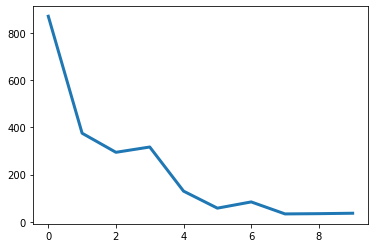

In [172]:
list_SSE=[SKM_1.best_SSE,SKM_2.best_SSE,SKM_3.best_SSE,SKM_4.best_SSE,SKM_5.best_SSE,SKM_6.best_SSE,SKM_7.best_SSE,SKM_8.best_SSE,SKM_9.best_SSE,SKM_10.best_SSE]

import matplotlib.pyplot as plt
plt.plot(list_SSE,linewidth=3)
plt.show()

＜クラスタ分析＞

In [13]:
# Wholesale customers Data Setをダウンロードし取り込み
import pandas as pd
import numpy as np

ap_data=pd.read_csv("/Users/chidayasuhiro/diveintocode-ml/Wholesale customers data.csv")

ap_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [14]:
# RegionとChannelを取り除く
ap_data1=ap_data[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]

In [15]:
# PCAのサンプルコードを使用
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(ap_data1)
data_pca = pca.transform(ap_data1)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


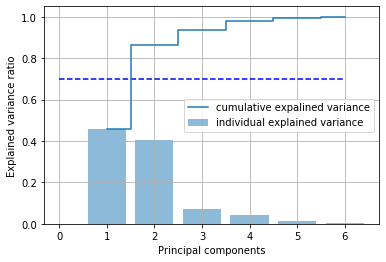

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(ap_data1)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

【問題10】クラスタ数kの選択

In [27]:
# エルボー法でクラスタ数を確認し、可視化する

# k=1の場合
k=1
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k1=SSE_sampel(daz,chiz)

# k=2の場合
k=2
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k2=SSE_sampel(daz,chiz)

# k=3の場合
k=3
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k3=SSE_sampel(daz,chiz)

# k=4の場合
k=4
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k4=SSE_sampel(daz,chiz)

# k=5の場合
k=5
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k5=SSE_sampel(daz,chiz)

# k=6の場合
k=6
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k6=SSE_sampel(daz,chiz)

# k=7の場合
k=7
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k7=SSE_sampel(daz,chiz)

# k=8の場合
k=8
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k8=SSE_sampel(daz,chiz)

# k=9の場合
k=9
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k9=SSE_sampel(daz,chiz)

# k=10の場合
k=10
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k10=SSE_sampel(daz,chiz)

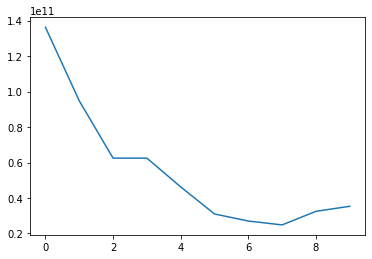

In [28]:
list_eru=[k1,k2,k3,k4,k5,k6,k7,k8,k9,k10]
import matplotlib.pyplot as plt
plt.plot(list_eru)
plt.show()

クラスタ数kについて・・・エルボー法では２か４が適切に思われる。人間が後々どう利用したいのかという点から考えてみると、顧客である小売店やレストランが何段階かのレベルに分けたデータが有用であると思われる、それが２つのクラスでは少し有用度が下がってしまう可能性があるので、クラスタ数は４が妥当に思われ流。それ以上増やしても必要以上に分割されて逆に扱いづらい分析になってしまう可能性がある。

【問題11】既知のグループとの比較

まず、Channelの場合、Regionの場合の既知のグループを可視化する

In [24]:
Channel_data=np.array(ap_data["Channel"])

In [29]:
Channel_data1=Channel_data.reshape(440,1)

In [32]:
Channel_data1.shape

(440, 1)

In [27]:
data_pca.shape

(440, 2)

In [62]:
Channel_data2=np.concatenate([Channel_data1,data_pca],axis=1)
Channel_data3=Channel_data2[np.argsort(Channel_data2[:,0])]

Channel_data4_1=Channel_data3[0:297,1]
Channel_data4_2=Channel_data3[0:297,2]
Channel_data5_1=Channel_data3[298:,1]
Channel_data5_2=Channel_data3[298:,2]

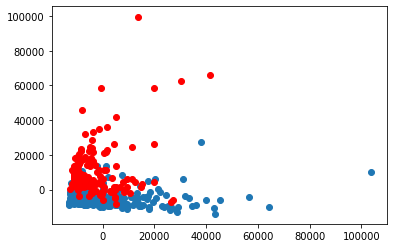

In [64]:
plt.scatter(Channel_data4_1,Channel_data4_2)
plt.scatter(Channel_data5_1,Channel_data5_2,color="red")
plt.show()

In [67]:
Region_data=np.array(ap_data["Region"])
Region_data1=Region_data.reshape(440,1)

Region_data2=np.concatenate([Region_data1,data_pca],axis=1)
Region_data3=Region_data2[np.argsort(Region_data2[:,0])]

In [80]:
Region_data3_1=Region_data3[0:76,1]
Region_data3_2=Region_data3[0:76,2]

Region_data4_1=Region_data3[77:123,1]
Region_data4_2=Region_data3[77:123,2]

Region_data5_1=Region_data3[124:,1]
Region_data5_2=Region_data3[124:,2]

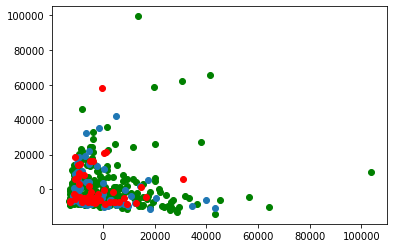

In [83]:
plt.scatter(Region_data5_1,Region_data5_2,color="green")
plt.scatter(Region_data3_1,Region_data3_2)
plt.scatter(Region_data4_1,Region_data4_2,color="red")
plt.show()

In [84]:
# 最適なk=4の場合
k=4
n=3
shoki=1
X_index=2
chiz,daz=sample_kmeans(data_pca,k,n,shoki,X_index)
k4_1=SSE_sampel(daz,chiz)

In [130]:
kage=[]
kage=np.array(kage)
for i in range(len(daz[0][0])):
    kage1=np.hstack((kage,daz[0][0][i]))
    kage=kage1
kage_1=kage.reshape(129,2)
kage_1_1=kage_1[:,0]
kage_1_2=kage_1[:,1]


kage2=[]
kage2=np.array(kage2)
for i in range(len(daz[0][1])):
    kage12=np.hstack((kage2,daz[0][1][i]))
    kage2=kage12
kage_12=kage2.reshape(62,2)
kage_12_1=kage_12[:,0]
kage_12_2=kage_12[:,1]

kage3=[]
kage3=np.array(kage3)
for i in range(len(daz[0][2])):
    kage13=np.hstack((kage3,daz[0][2][i]))
    kage3=kage13
kage_13=kage3.reshape(207,2)
kage_13_1=kage_13[:,0]
kage_13_2=kage_13[:,1]

kage4=[]
kage4=np.array(kage4)
for i in range(len(daz[0][3])):
    kage14=np.hstack((kage4,daz[0][3][i]))
    kage4=kage14
kage_14=kage4.reshape(42,2)
kage_14_1=kage_14[:,0]
kage_14_2=kage_14[:,1]

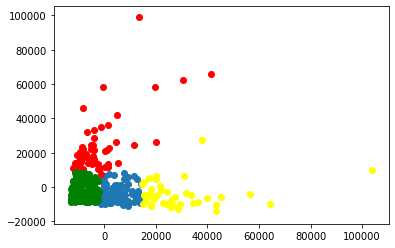

In [131]:
plt.scatter(kage_1_1,kage_1_2)
plt.scatter(kage_12_1,kage_12_2,color="red")
plt.scatter(kage_13_1,kage_13_2,color="green")
plt.scatter(kage_14_1,kage_14_2,color="yellow")
plt.show()

ここでわかりやすく、それぞれの可視化を並べてみる

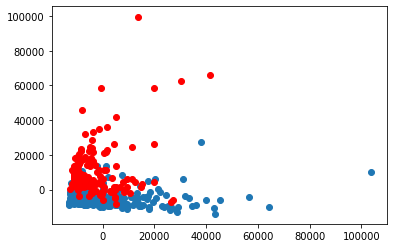

In [132]:
plt.scatter(Channel_data4_1,Channel_data4_2)
plt.scatter(Channel_data5_1,Channel_data5_2,color="red")
plt.show()

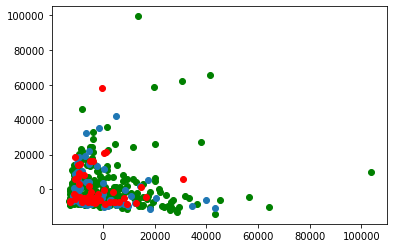

In [133]:
plt.scatter(Region_data5_1,Region_data5_2,color="green")
plt.scatter(Region_data3_1,Region_data3_2)
plt.scatter(Region_data4_1,Region_data4_2,color="red")
plt.show()

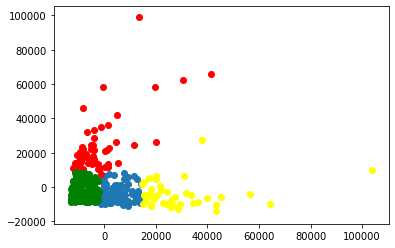

In [134]:
plt.scatter(kage_1_1,kage_1_2)
plt.scatter(kage_12_1,kage_12_2,color="red")
plt.scatter(kage_13_1,kage_13_2,color="green")
plt.scatter(kage_14_1,kage_14_2,color="yellow")
plt.show()

既知のグループとはクラスタリングによって明らかにキレイにグループ分けができていることがわかった

【問題12】卸売業者にとって有益な情報

有益な情報について、ここまでの分析からまとめたい。

可視化してわかったことであるが、RegionとChannelのグループわけはあまり良いグループ分けとなっていないことがわかった。一方で、グループを４つほどのクラスに分けることで、割とキレイにクラスを分割できることがわかった。
Channelは２つのグループに、Regionは３つのグループに分けていたが、今回のケースでのグループ分けは、４つほどのグループに分けることが有用であるようだ。
これ以上分けると、クラスわけの意味が少しずつ薄れてくる（分けても意味がない）可能性がある。

小売店やレストランが、卸売業者から何ユーロ購入しているかというデータであるわけだが、購入金額ごとに４つにグループ分けすることで、それぞれのグループに適切なセールスと、とあるグループでは大きなハズレ値があるため、単価の高い商品でも購入の可能性があるグループとも考えられるため、そのクラスにはまた新たなセールスのチャンスも出てくる可能性も見られる。